In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
data=pd.read_csv("Salary_dataset.csv")

In [3]:
data.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [4]:
data.isna().sum()

Unnamed: 0         0
YearsExperience    0
Salary             0
dtype: int64

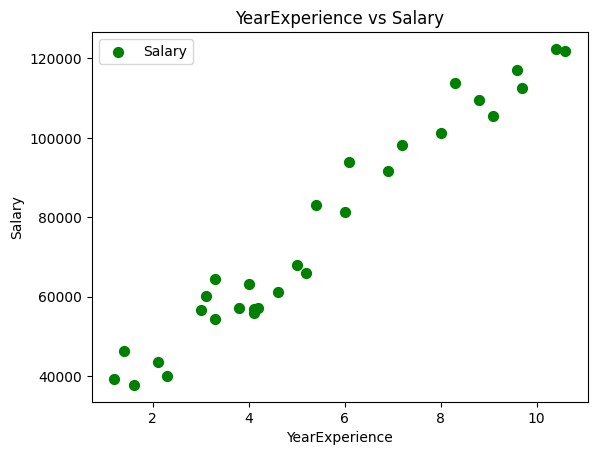

In [6]:
# checking correletion between Yearexperiece and Salary
x1=data.iloc[:,1:2].values
y1=data.iloc[:,2].values
plt.scatter(x1,y1,label='Salary',color='green',s=50)
plt.title("YearExperience vs Salary")
plt.xlabel("YearExperience")
plt.ylabel("Salary")
plt.legend()
plt.show()

In [7]:
data.YearsExperience.corr(data.Salary)

0.9782416184887599

In [9]:
# separting a depending varible 
X=data.iloc[:,1:2].values
print(X)

[[ 1.2]
 [ 1.4]
 [ 1.6]
 [ 2.1]
 [ 2.3]
 [ 3. ]
 [ 3.1]
 [ 3.3]
 [ 3.3]
 [ 3.8]
 [ 4. ]
 [ 4.1]
 [ 4.1]
 [ 4.2]
 [ 4.6]
 [ 5. ]
 [ 5.2]
 [ 5.4]
 [ 6. ]
 [ 6.1]
 [ 6.9]
 [ 7.2]
 [ 8. ]
 [ 8.3]
 [ 8.8]
 [ 9.1]
 [ 9.6]
 [ 9.7]
 [10.4]
 [10.6]]


In [11]:
# separting a dependent variable or target varible
y=data.iloc[:,2].values
print(y)


[ 39344.  46206.  37732.  43526.  39892.  56643.  60151.  54446.  64446.
  57190.  63219.  55795.  56958.  57082.  61112.  67939.  66030.  83089.
  81364.  93941.  91739.  98274. 101303. 113813. 109432. 105583. 116970.
 112636. 122392. 121873.]


# Step 2-Splitting the dataset into training and testing set

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3-Build a linear model

In [15]:
#Creating linear regression model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

# Traing a model

In [16]:
regressor.fit(X_train,y_train)

LinearRegression()

# Prediction on Training Data : Training Accuracy

In [19]:
y_train_pred=regressor.predict(X_train)

In [20]:
pd.DataFrame({'Orginal Salary':y_train,'predicated Salary':y_train_pred})

,Orginal Salary,predicated Salary
0,39344.0,36192.428231
1,39892.0,46465.418127
2,66030.0,73548.755126
3,56643.0,53002.775334
4,57082.0,64209.673403
5,55795.0,63275.765230
6,101303.0,99698.183953
7,46206.0,38060.244576
8,37732.0,39928.060921
9,105583.0,109971.173849


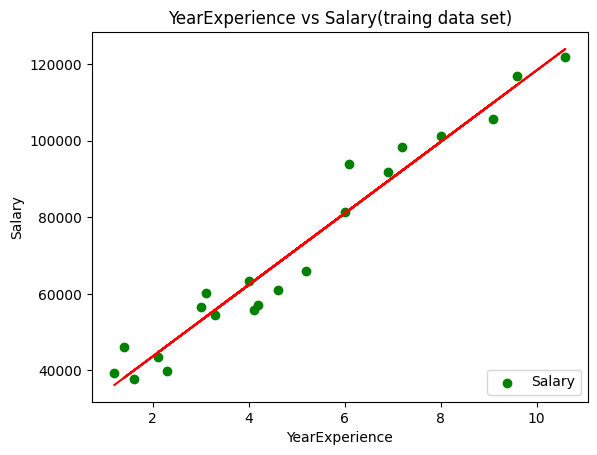

In [21]:
# visualize the Training data set
plt.scatter(X_train,y_train,label='Salary',color='green')
plt.plot(X_train,y_train_pred,color='red')
plt.title("YearExperience vs Salary(traing data set)")
plt.xlabel("YearExperience")
plt.ylabel("Salary")
plt.legend(loc='lower right')
plt.show()

In [23]:
print("coffient ",regressor.coef_) # cofficent mean the slop 
print("intersept",regressor.intercept_) # intersept mean y intersept

coffient  [9339.08172382]
intersept 24985.53016251169


In [28]:
print("Variance score : %.2f" %regressor.score(X_train,y_train))

Variance score : 0.96


# Prediction on Testing Data : Testing Accuracy

In [29]:
y_test_pred=regressor.predict(X_test)

In [31]:
pd.DataFrame({"Original Salary":y_test, "Predicted Salary":y_test_pred })

,Original Salary,Predicted Salary
0,112636.0,115574.622884
1,67939.0,71680.938782
2,113813.0,102499.908470
3,83089.0,75416.571471
4,64446.0,55804.499851
5,57190.0,60474.040713
6,122392.0,122111.980090
7,109432.0,107169.449332
8,56958.0,63275.765230


In [32]:

# The mean squared error
print("Mean squared error: %.2f" % np.mean((regressor.predict(X_test) - y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regressor.score(X_test, y_test))


Mean squared error: 37784662.47
Variance score: 0.94


In [33]:
def predictedSalary(YearExperience):
    return regressor.predict([[Salary]])

In [39]:
# Assuming you have a function to predict salary based on years of experience
def predictedSalary(year_experience):
    # Dummy function: replace with actual model logic
    return 50000 + (year_experience * 1000)

try:
    # Convert the input to float
    year_experience = float(input("If you want to guess your salary, please provide your years of experience in years: "))
    # Predict the salary
    salary = predictedSalary(year_experience)
    print(f"Our model says your salary is about ${salary:.2f}")
except ValueError:
    print("Please enter a valid number for years of experience.")


If you want to guess your salary, please provide your years of experience in years: 13
Our model says your salary is about $63000.00
